In [97]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv('insurance.csv')

In [99]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.30,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.70,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.10,100,No,0,No,northwest,1137.01


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [101]:
df.shape

(1340, 10)

In [102]:
pd.set_option('display.float_format', "{:.2f}".format)

In [103]:
sns.set(style='whitegrid', palette='Set2', font_scale=1.1)

In [104]:
df.duplicated().sum()

0

In [105]:
df.isna().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [106]:
df.dropna(inplace=True)
df.shape

(1332, 10)

In [107]:
df.describe(include='all')

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.00,1332.00,1332,1332.00,1332.00,1332,1332.00,1332,1332,1332.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,13325.25
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,12109.62
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,4760.16
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,9412.97
75%,1007.25,47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,16781.33


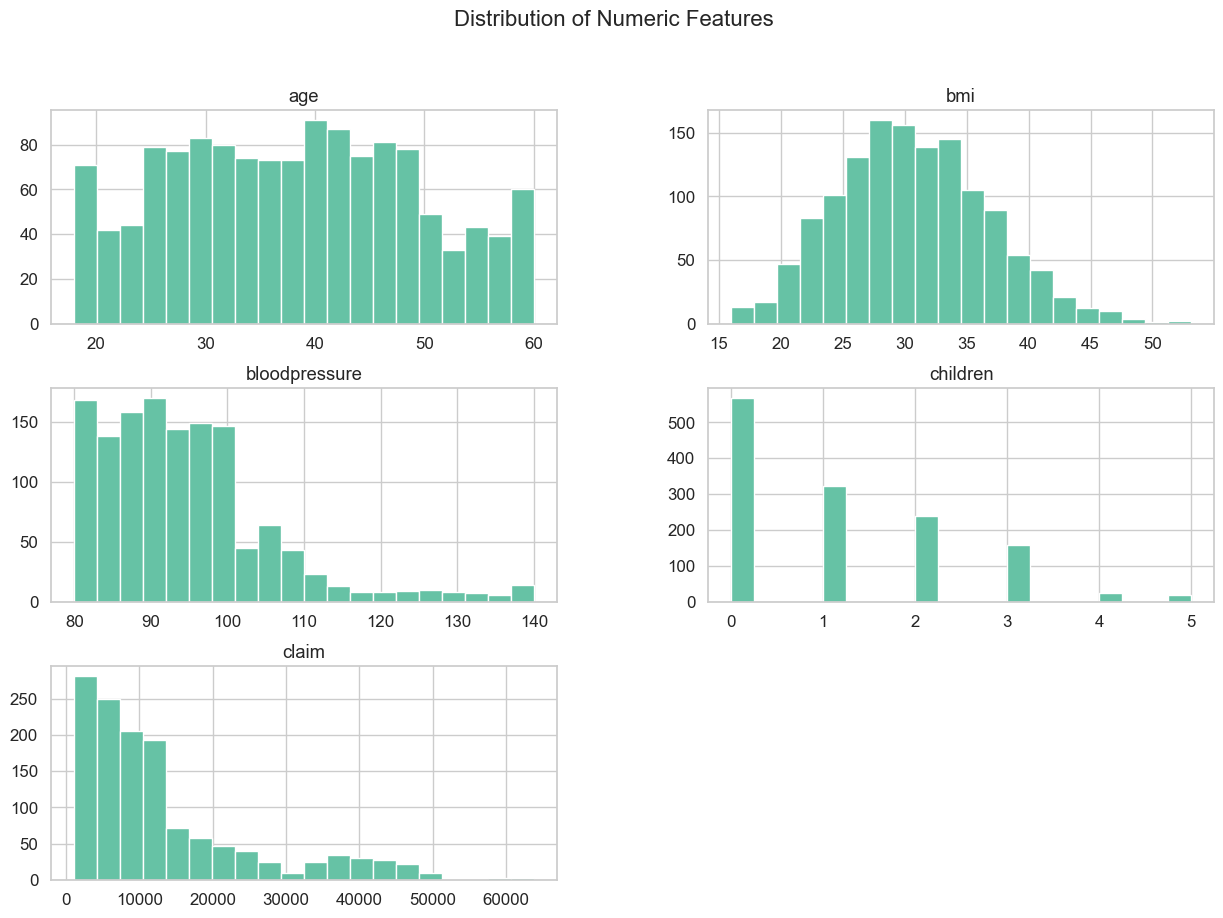

In [108]:
numeric_cols = ['age', 'bmi', 'bloodpressure', 'children', 'claim']
df[numeric_cols].hist(bins=20, figsize=(15, 10), layout=(3,2))
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()

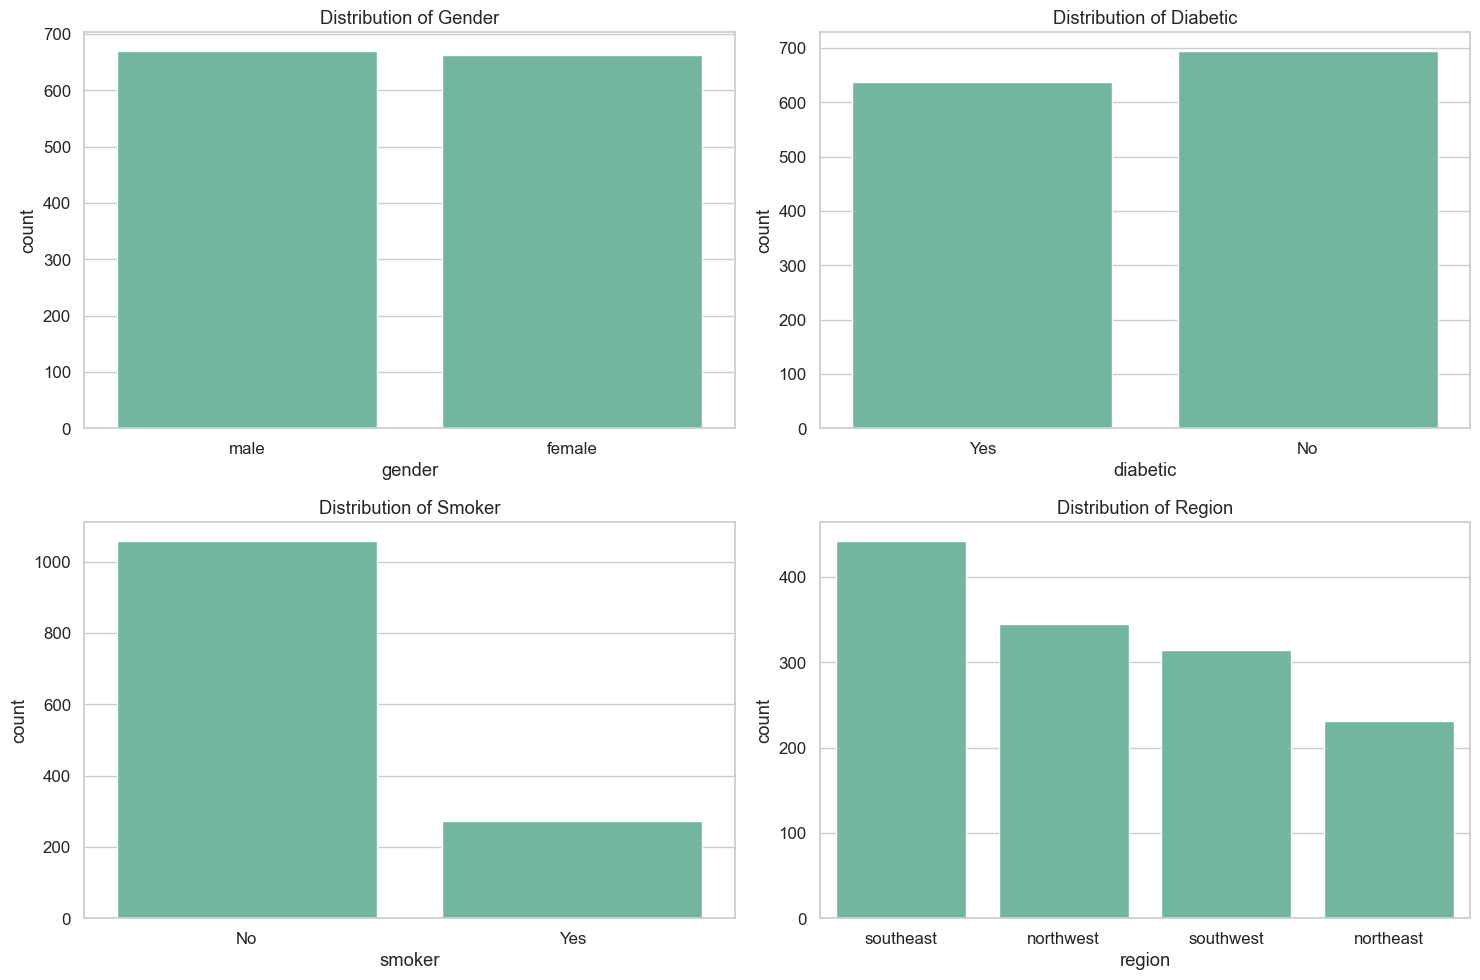

In [109]:
cat_cols = ['gender', 'diabetic', 'smoker', 'region']
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col.capitalize()}')
plt.tight_layout()
plt.show()

In [110]:
df.groupby(['gender', 'smoker'])['claim'].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

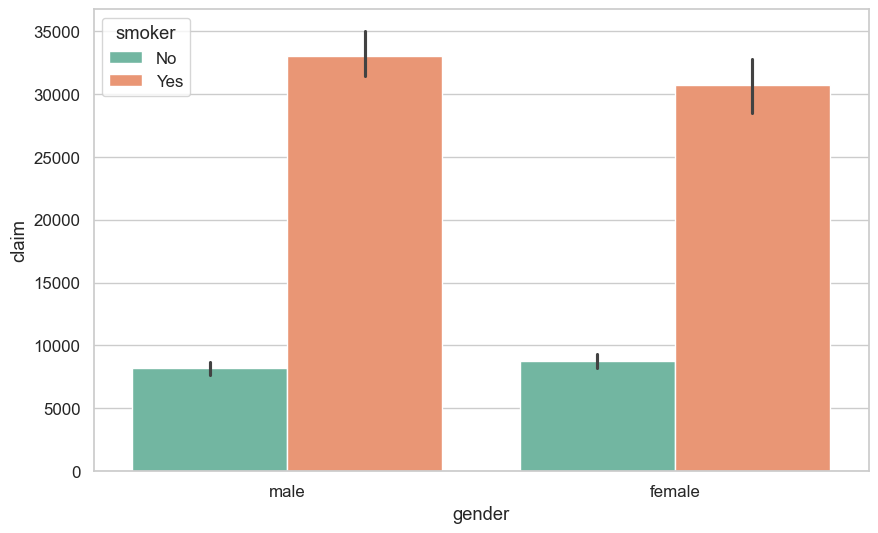

In [111]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='gender', y='claim', hue='smoker')  #hue for splitting by smoker status
plt.show()

In [112]:
pivot_region_diabetic = df.groupby(['region', 'diabetic'])['claim'].mean().unstack()
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


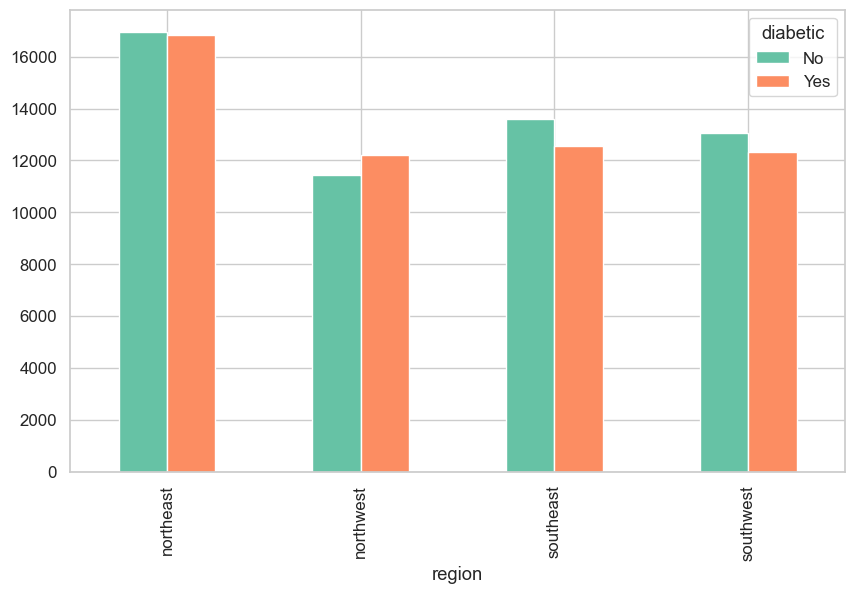

In [113]:
pivot_region_diabetic.plot(kind='bar', figsize=(10,6))
plt.show()

In [114]:
pivot_table = df.groupby(['region', 'smoker'])['claim'].mean().unstack()
#alternate way using pivot
#pivot_table = df.pivot_table(values='claim', index='region', columns='smoker', aggfunc='mean')
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [115]:
numeric_cols

['age', 'bmi', 'bloodpressure', 'children', 'claim']

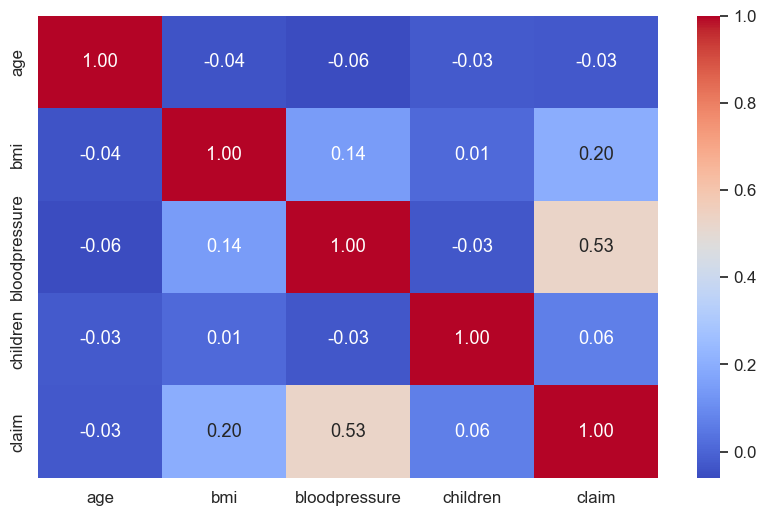

In [116]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [117]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '61+'])
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87,31-45
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51,19-30
7,8,19.00,male,41.10,100,No,0,No,northwest,1146.80,19-30
8,9,20.00,male,43.00,86,No,0,No,northwest,1149.40,19-30
9,10,30.00,male,53.10,97,No,0,No,northwest,1163.46,19-30
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40,31-45
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07,46-60
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40,19-30
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87,31-45


In [118]:
df['age_group'].value_counts()

age_group
31-45    553
46-60    383
19-30    380
0-18      16
61+        0
Name: count, dtype: int64

In [119]:
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df['bmi_category'].value_counts()

bmi_category
Obese          702
Overweight     387
Normal         222
Underweight     21
Name: count, dtype: int64

In [120]:
region_stats = df.groupby('region').agg(
    smoker_rate = ("smoker", lambda x: (x=="Yes").mean() * 100),
    mean_claim = ("claim", "mean")
).reset_index()

In [121]:
region_stats

,region,smoker_rate,mean_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

In [123]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_category'],
      dtype='object')

In [124]:
x = df[['age','gender','bmi','bloodpressure','diabetic','children','smoker',]]
y = df['claim']

In [125]:
x.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,male,23.20,91,Yes,0,No
1,24.00,male,30.10,87,No,0,No
7,19.00,male,41.10,100,No,0,No
8,20.00,male,43.00,86,No,0,No
9,30.00,male,53.10,97,No,0,No


In [126]:
cat_cols = ['gender','diabetic','smoker']
label_encoders = {}

In [127]:
for col in cat_cols:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])
    label_encoders[col] = le

    joblib.dump(le, f'{col}_label_encoder.pkl')

C:\Users\itsad\AppData\Local\Temp\ipykernel_19260\585127605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = le.fit_transform(x[col])
C:\Users\itsad\AppData\Local\Temp\ipykernel_19260\585127605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = le.fit_transform(x[col])
C:\Users\itsad\AppData\Local\Temp\ipykernel_19260\585127605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [128]:
x

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,1,23.20,91,1,0,0
1,24.00,1,30.10,87,0,0,0
7,19.00,1,41.10,100,0,0,0
8,20.00,1,43.00,86,0,0,0
9,30.00,1,53.10,97,0,0,0
...,...,...,...,...,...,...,...
1335,44.00,0,35.50,88,1,0,1
1336,59.00,0,38.10,120,0,1,1
1337,30.00,1,34.50,91,1,3,1
1338,37.00,1,30.40,106,0,0,1


In [129]:
label_encoders

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [130]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [131]:
num_cols = ['age','bmi','bloodpressure','children']
scaler = StandardScaler()

In [132]:
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [133]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [134]:
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(1065, 7) (1065,)
(267, 7) (267,)


In [135]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [136]:
def evaluate_model(model,x_train,x_test,y_train,y_test):
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return {"R2": r2, "MAE": mae, "RMSE": rmse}

In [137]:
results= {}

In [138]:
lr = LinearRegression()
lr.fit(x_train, y_train)
results['Linear Regression'] = evaluate_model(lr, x_train, x_test, y_train, y_test)
print("Linear regression done")

best_poly_model = None
best_poly_score = -np.inf

rf = RandomForestRegressor()
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(rf, rf_params, cv=3, n_jobs=1, scoring='r2', verbose=0)
rf_grid.fit(x_train, y_train)
best_rf = rf_grid.best_estimator_
results['Random Forest'] = evaluate_model(best_rf, x_train, x_test, y_train, y_test)
print("Random Forest done, best params:", rf_grid.best_params_)


svr = SVR()
svr_params = {
    "kernel": ["linear", "rbf"],
    "C": [0.1, 0.2,0.5],
    "degree": [2, 3],
}

svr_grid = GridSearchCV(svr, svr_params, cv=3, n_jobs=1, scoring='r2')
svr_grid.fit(x_train, y_train)
best_svr = svr_grid.best_estimator_
results['SVR'] = evaluate_model(svr_grid.best_estimator_, x_train, x_test, y_train, y_test)
print("SVR done, best params:", svr_grid.best_params_)

xgb = XGBRegressor(objective='reg:squarederror')
xgb_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "subsample": [ 0.8, 1.0],
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, n_jobs=1, scoring='r2')
xgb_grid.fit(x_train, y_train)
best_xgb = xgb_grid.best_estimator_
results['XGBoost'] = evaluate_model(best_xgb, x_train, x_test, y_train, y_test)
print("XGBoost done, best params:", xgb_grid.best_params_)

Linear regression done
Random Forest done, best params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
SVR done, best params: {'C': 0.5, 'degree': 2, 'kernel': 'linear'}
XGBoost done, best params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [139]:
results


{'Linear Regression': {'R2': 0.7178071778652817,
  'MAE': 5128.994595063274,
  'RMSE': 6659.325455989577},
 'Random Forest': {'R2': 0.8221539824433964,
  'MAE': 4128.601355609862,
  'RMSE': 5286.63505324665},
 'SVR': {'R2': -0.07002466769648907,
  'MAE': 8701.478704187075,
  'RMSE': 12967.437211456006},
 'XGBoost': {'R2': 0.8259290126137122,
  'MAE': 4103.343053385416,
  'RMSE': 5230.226000274696}}

In [141]:
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
results_df

,R2,MAE,RMSE
XGBoost,0.83,4103.34,5230.23
Random Forest,0.82,4128.60,5286.64
Linear Regression,0.72,5128.99,6659.33
SVR,-0.07,8701.48,12967.44


In [143]:
models = {
    "LinearRegression" : lr,
    "RandomForestRegressor" : best_rf,
    "SVR" : best_svr,
    "XGBRegressor" : best_xgb
}

In [144]:
best_r2 = results_df['R2'].max()

In [145]:
best_r2

0.8259290126137122

In [147]:
top_model = results_df[results_df['R2'] == best_r2]
top_model

,R2,MAE,RMSE
XGBoost,0.83,4103.34,5230.23


In [151]:
best_model = best_xgb

In [152]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [154]:
joblib.dump(best_model, 'best_health_insurance_model.pkl')
print("Best model saved as 'best_health_insurance_model.pkl'")

Best model saved as 'best_health_insurance_model.pkl'
